## CHEMOUT Data Analysis

In [197]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.signal import find_peaks
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [198]:
pd.set_option('display.float_format', lambda x: '{:.6e}'.format(x))

In [199]:
# Define the table's column names based on the image
columns = ["source","V_LSR", "N(H2)", "R_GC", "M", "L"]

# Define the data corresponding to the columns
data = [
    ["WB89-315", -95.09, 3.7, 17.1, None, None],
    ["WB89-379", -89.32, 6.5, 17.3, 532, 1.44],
    ["WB89-380", -86.67, 11.4, 17.0, None, None],
    ["WB89-391", -86.06, 5.2, 16.9, None, None],
    ["WB89-399", -82.19, 6.3, 16.8, 1685, 16.3],
    ["WB89-437", -71.72, 14.2, 16.2, None, None],
    ["WB89-440", -72.20, 4.1, 16.4, None, None],
    ["WB89-501", -58.44, 11.2, 16.4, None, None],
    ["WB89-529", -60.08, 4.7, 17.8, 408, 10.1],
    ["WB89-572", -48.03, 3.8, 20.4, None, None],
    ["WB89-621", -25.38, 13.0, 22.6, 920, 41.2],
    ["WB89-640", -25.42, 3.2, 18.4, None, None],
    ["WB89-670", -17.52, 7.3, 23.5, None, None],
    ["WB89-705", -12.10, 1.7, 21.4, None, None],
    ["WB89-789", 34.33, 5.8, 20.3, 1066, 9.75],
    ["WB89-793", 30.48, 5.9, 18.1, 204, 0.77],
    ["WB89-898", 63.41, 2.5, 16.4, None, None],
    ["19383+2711", -66.85, None, 13.2, None, None],
    ["19423+2541", -72.62, None, 13.6, 1278, 104.5],
    ["19489+3030", -68.91, None, 13.0, None, None],
    ["19571+3113", -62.48, None, 12.2, None, None],
    ["20243+3853", -73.06, None, 12.9, 891, 15.9],
    ["WB89-002", -2.75, 7.8, 8.6, None, None],
    ["WB89-006", -91.38, 6.3, 14.9, None, None],
    ["WB89-014", -96.03, 4.6, 15.5, None, None],
    ["WB89-031", -89.40, 1.2, 14.6, None, None],
    ["WB89-035", -77.68, 5.2, 13.4, 367, 5.23],
    ["WB89-040", -62.65, 4.1, 12.1, 613, 0.62],
    ["WB89-060", -84.29, 9.3, 14.0, None, None],
    ["WB89-076", -97.17, 5.0, 15.7, 355, 0.82],
    ["WB89-080", -74.24, 8.5, 13.1, 299, 1.44],
    ["WB89-083", -93.77, 2.8, 15.3, 220, 0.82],
    ["WB89-152", -88.13, 2.8, 14.8, None, None],
    ["WB89-283", -94.49, 5.8, 16.5, 140, 4.80],
    ["WB89-288", -100.87, 3.4, 17.5, 373, 3.22]
]

In [200]:
# Create DataFrame
df = pd.DataFrame(data, columns=columns)
df

,source,V_LSR,N(H2),R_GC,M,L
0,WB89-315,-9.509000e+01,3.700000e+00,1.710000e+01,NaN,NaN
1,WB89-379,-8.932000e+01,6.500000e+00,1.730000e+01,5.320000e+02,1.440000e+00
2,WB89-380,-8.667000e+01,1.140000e+01,1.700000e+01,NaN,NaN
3,WB89-391,-8.606000e+01,5.200000e+00,1.690000e+01,NaN,NaN
4,WB89-399,-8.219000e+01,6.300000e+00,1.680000e+01,1.685000e+03,1.630000e+01
5,WB89-437,-7.172000e+01,1.420000e+01,1.620000e+01,NaN,NaN
6,WB89-440,-7.220000e+01,4.100000e+00,1.640000e+01,NaN,NaN
7,WB89-501,-5.844000e+01,1.120000e+01,1.640000e+01,NaN,NaN
8,WB89-529,-6.008000e+01,4.700000e+00,1.780000e+01,4.080000e+02,1.010000e+01
9,WB89-572,-4.803000e+01,3.800000e+00,2.040000e+01,NaN,NaN


In [201]:
# Extract the 'N(H2)' column
n_h2 = df["N(H2)"]
n_h2

0    3.700000e+00
1    6.500000e+00
2    1.140000e+01
3    5.200000e+00
4    6.300000e+00
5    1.420000e+01
6    4.100000e+00
7    1.120000e+01
8    4.700000e+00
9    3.800000e+00
10   1.300000e+01
11   3.200000e+00
12   7.300000e+00
13   1.700000e+00
14   5.800000e+00
15   5.900000e+00
16   2.500000e+00
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22   7.800000e+00
23   6.300000e+00
24   4.600000e+00
25   1.200000e+00
26   5.200000e+00
27   4.100000e+00
28   9.300000e+00
29   5.000000e+00
30   8.500000e+00
31   2.800000e+00
32   2.800000e+00
33   5.800000e+00
34   3.400000e+00
Name: N(H2), dtype: float64

In [202]:
# Extract the 'M' column
M = df["M"]
M

0             NaN
1    5.320000e+02
2             NaN
3             NaN
4    1.685000e+03
5             NaN
6             NaN
7             NaN
8    4.080000e+02
9             NaN
10   9.200000e+02
11            NaN
12            NaN
13            NaN
14   1.066000e+03
15   2.040000e+02
16            NaN
17            NaN
18   1.278000e+03
19            NaN
20            NaN
21   8.910000e+02
22            NaN
23            NaN
24            NaN
25            NaN
26   3.670000e+02
27   6.130000e+02
28            NaN
29   3.550000e+02
30   2.990000e+02
31   2.200000e+02
32            NaN
33   1.400000e+02
34   3.730000e+02
Name: M, dtype: float64

In [203]:
# Extract the 'L' column
L = df["L"]
L

0             NaN
1    1.440000e+00
2             NaN
3             NaN
4    1.630000e+01
5             NaN
6             NaN
7             NaN
8    1.010000e+01
9             NaN
10   4.120000e+01
11            NaN
12            NaN
13            NaN
14   9.750000e+00
15   7.700000e-01
16            NaN
17            NaN
18   1.045000e+02
19            NaN
20            NaN
21   1.590000e+01
22            NaN
23            NaN
24            NaN
25            NaN
26   5.230000e+00
27   6.200000e-01
28            NaN
29   8.200000e-01
30   1.440000e+00
31   8.200000e-01
32            NaN
33   4.800000e+00
34   3.220000e+00
Name: L, dtype: float64

In [204]:
# Extract the 'R_GC' column
R_GC= df["R_GC"]
R_GC

0    1.710000e+01
1    1.730000e+01
2    1.700000e+01
3    1.690000e+01
4    1.680000e+01
5    1.620000e+01
6    1.640000e+01
7    1.640000e+01
8    1.780000e+01
9    2.040000e+01
10   2.260000e+01
11   1.840000e+01
12   2.350000e+01
13   2.140000e+01
14   2.030000e+01
15   1.810000e+01
16   1.640000e+01
17   1.320000e+01
18   1.360000e+01
19   1.300000e+01
20   1.220000e+01
21   1.290000e+01
22   8.600000e+00
23   1.490000e+01
24   1.550000e+01
25   1.460000e+01
26   1.340000e+01
27   1.210000e+01
28   1.400000e+01
29   1.570000e+01
30   1.310000e+01
31   1.530000e+01
32   1.480000e+01
33   1.650000e+01
34   1.750000e+01
Name: R_GC, dtype: float64

In [205]:
L = L*10**3

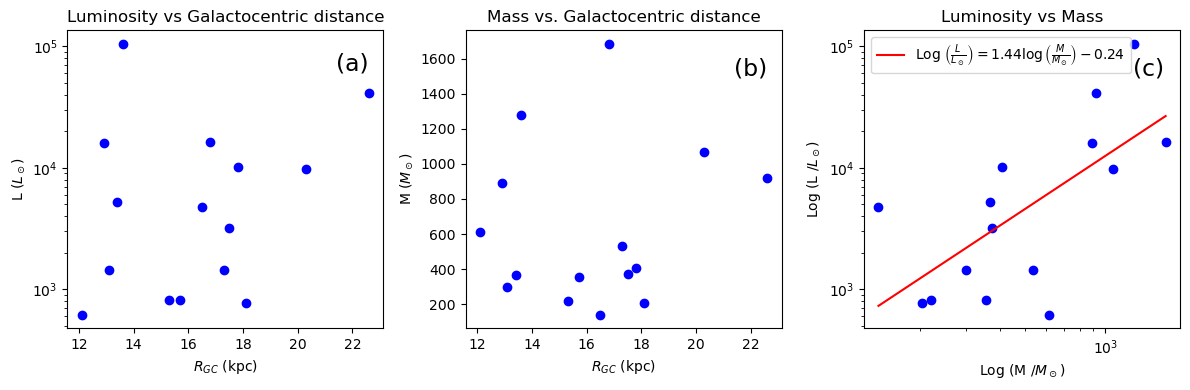

In [206]:
from scipy.stats import linregress

mask = ~np.isnan(R_GC) & ~np.isnan(L) & ~np.isnan(M)
R_GC_mask = R_GC[mask]
L = L[mask]
M = M[mask]

log_L = np.log10(L)
log_M = np.log10(M)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))  

# L vs R_GC
axs[0].scatter(R_GC_mask, L, color='blue')
axs[0].set_title('Luminosity vs Galactocentric distance')
axs[0].set_xlabel('$R_{GC}$ (kpc)')
axs[0].set_ylabel(r'L ($L_\odot)$')
axs[0].set_yscale('log')
axs[0].text(0.85, 0.85, '(a)', transform=axs[0].transAxes, fontsize=17, verticalalignment='bottom')

# M vs R_GC
axs[1].scatter(R_GC_mask, M, color='blue')
axs[1].set_title('Mass vs. Galactocentric distance')
axs[1].set_xlabel('$R_{GC}$ (kpc)')
axs[1].set_ylabel(r'M ($M_\odot$)')
axs[1].text(0.85, 0.85, '(b)', transform=axs[1].transAxes, fontsize=17, verticalalignment='baseline')

# L vs M
slope, intercept, r_value, p_value, std_err = linregress(log_M, log_L)
r_squared = r_value**2  

log_M_fit = np.linspace(min(log_M), max(log_M), 1000)
log_L_fit = intercept + slope * log_M_fit

axs[2].scatter(M, L, color='blue')
M_fit = 10**log_M_fit
L_fit = 10**log_L_fit

axs[2].plot(M_fit, L_fit, color='red', label=f'Log $\\left(\\frac{{L}}{{L_\\odot}}\\right)={slope:.2f} \\log \\left(\\frac{{M}}{{M_\\odot}}\\right) {intercept:.2f}$')
axs[2].set_xscale('log')
axs[2].set_yscale('log')


axs[2].set_title('Luminosity vs Mass')
axs[2].set_xlabel('Log (M /$M_\odot$)')
axs[2].set_ylabel(r'Log (L /$L_\odot)$')
axs[2].legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=10)
axs[2].text(0.9, 0.85, '(c)', transform=axs[2].transAxes, fontsize=17, horizontalalignment='center')
plt.tight_layout()

plt.savefig('source_properties_with_regression.png')

### Abundance calculation

In [207]:
n_h2=n_h2*10**(21)
n_h2

0    3.700000e+21
1    6.500000e+21
2    1.140000e+22
3    5.200000e+21
4    6.300000e+21
5    1.420000e+22
6    4.100000e+21
7    1.120000e+22
8    4.700000e+21
9    3.800000e+21
10   1.300000e+22
11   3.200000e+21
12   7.300000e+21
13   1.700000e+21
14   5.800000e+21
15   5.900000e+21
16   2.500000e+21
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22   7.800000e+21
23   6.300000e+21
24   4.600000e+21
25   1.200000e+21
26   5.200000e+21
27   4.100000e+21
28   9.300000e+21
29   5.000000e+21
30   8.500000e+21
31   2.800000e+21
32   2.800000e+21
33   5.800000e+21
34   3.400000e+21
Name: N(H2), dtype: object

* CS

In [208]:
CS = [["WB89-315",12.24 ],
    ["WB89-379", 12.8],
    ["WB89-380", 13.12],
    ["WB89-391", 12.88],
    ["WB89-399", 12.8],
    ["WB89-437", 13.76],
    ["WB89-440", None],
    ["WB89-501", 12.96],
    ["WB89-529", 12.24],
    ["WB89-572", 12.64],
    ["WB89-621", 13.68],
    ["WB89-640", 13.52],
    ["WB89-670", 13.12],
    ["WB89-705", 13.2],
    ["WB89-789", 13.28],
    ["WB89-793", 12.0],
    ["WB89-898", 13.2],
    ["19383+2711",13.08],
    ["19423+2541",13.6],
    ["19489+3030",13.2],
    ["19571+3113",13.0],
    ["20243+3853",13.1],
    ["WB89-002", 13.04],
    ["WB89-006", 13.16],
    ["WB89-014", 12.44],
    ["WB89-031", 12.32],
    ["WB89-035", 12.66],
    ["WB89-040", 13.28],
    ["WB89-060", 13.0],
    ["WB89-076", 13.44],
    ["WB89-080", 12.8],
    ["WB89-083", 13.04],
    ["WB89-152", 12.88],
    ["WB89-283", 12.64],
    ["WB89-288", 12.24]
]

In [209]:
columns = ["source", "N(CS)"]

In [210]:
df = pd.DataFrame(CS, columns=columns)
n_cs = df["N(CS)"]

In [211]:
n_cs=10**n_cs

In [212]:
n_cs

0    1.737801e+12
1    6.309573e+12
2    1.318257e+13
3    7.585776e+12
4    6.309573e+12
5    5.754399e+13
6             NaN
7    9.120108e+12
8    1.737801e+12
9    4.365158e+12
10   4.786301e+13
11   3.311311e+13
12   1.318257e+13
13   1.584893e+13
14   1.905461e+13
15   1.000000e+12
16   1.584893e+13
17   1.202264e+13
18   3.981072e+13
19   1.584893e+13
20   1.000000e+13
21   1.258925e+13
22   1.096478e+13
23   1.445440e+13
24   2.754229e+12
25   2.089296e+12
26   4.570882e+12
27   1.905461e+13
28   1.000000e+13
29   2.754229e+13
30   6.309573e+12
31   1.096478e+13
32   7.585776e+12
33   4.365158e+12
34   1.737801e+12
Name: N(CS), dtype: float64

In [213]:
#Abundances CS/H2

X_CS= n_cs/n_h2

In [214]:
X_CS

0    4.696759e-10
1    9.707036e-10
2    1.156366e-09
3    1.458803e-09
4    1.001520e-09
5    4.052394e-09
6             NaN
7    8.142954e-10
8    3.697449e-10
9    1.148726e-09
10   3.681770e-09
11   1.034785e-08
12   1.805831e-09
13   9.322901e-09
14   3.285277e-09
15   1.694915e-10
16   6.339573e-09
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22   1.405741e-09
23   2.294349e-09
24   5.987454e-10
25   1.741080e-09
26   8.790157e-10
27   4.647465e-09
28   1.075269e-09
29   5.508457e-09
30   7.423028e-10
31   3.915994e-09
32   2.709206e-09
33   7.526135e-10
34   5.111179e-10
dtype: object

In [215]:
error_CS=X_CS*0.15

* C8O

In [216]:
C8O = [["WB89-315",None ],
    ["WB89-379", None],
    ["WB89-380", None],
    ["WB89-391", None],
    ["WB89-399", None],
    ["WB89-437", None],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None], 
    ["WB89-621", None],
    ["WB89-640", None],
    ["WB89-670", None],
    ["WB89-705", None],
    ["WB89-789", None],
    ["WB89-793", None],
    ["WB89-898", None],
    ["19383+2711",15.12],
    ["19423+2541",None],
    ["19489+3030",None],
    ["19571+3113",None],
    ["20243+3853",None],
    ["WB89-002", None],
    ["WB89-006", None],
    ["WB89-014", None],
    ["WB89-031", None],
    ["WB89-035", None],
    ["WB89-040", None],
    ["WB89-060", 18.44],
    ["WB89-076", None],
    ["WB89-080", None],
    ["WB89-083", None],
    ["WB89-152",None ],
    ["WB89-283", None],
    ["WB89-288",None ]
]

In [217]:
columns = ["source", "N(C8O)"]

In [218]:
df = pd.DataFrame(C8O, columns=columns)
n_c8o = df["N(C8O)"]

In [219]:
n_c8o=10**n_c8o

In [220]:
n_c8o

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17   1.318257e+15
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28   2.754229e+18
29            NaN
30            NaN
31            NaN
32            NaN
33            NaN
34            NaN
Name: N(C8O), dtype: float64

In [221]:
#Abundances C8O/H2

X_C8O= n_c8o/n_h2

In [222]:
X_C8O

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28   2.961536e-04
29            NaN
30            NaN
31            NaN
32            NaN
33            NaN
34            NaN
dtype: object

In [223]:
error_C8O=X_C8O*0.15

* CS-34

In [224]:
CS_34 = [["WB89-315", 11.98],
    ["WB89-379", 11.74],
    ["WB89-380", 11.9],
    ["WB89-391", 11.8],
    ["WB89-399", 11.8],
    ["WB89-437", 12.4],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None],
    ["WB89-621", 12.6],
    ["WB89-640", 12.0],
    ["WB89-670", 12.2],
    ["WB89-705", 12.3],
    ["WB89-789", 11.6],
    ["WB89-793", 12.2],
    ["WB89-898", 11.9],
    ["19383+2711", None],
    ["19423+2541", 12.0],
    ["19489+3030", 12.1],
    ["19571+3113", 11.92],
    ["20243+3853", 11.68],
    ["WB89-002", None],
    ["WB89-006", 11.88],
    ["WB89-014", None],
    ["WB89-031", 11.92],
    ["WB89-035", None],
    ["WB89-040", 12.0],
    ["WB89-060", 12.559],
    ["WB89-076", 12.2],
    ["WB89-080", None],
    ["WB89-083", 11.96],
    ["WB89-152", None],
    ["WB89-283", None],
    ["WB89-288", None]
]

In [225]:
columns = ["source", "N(CS-34)"]

In [226]:
df = pd.DataFrame(CS_34, columns=columns)
n_cs_34 = df["N(CS-34)"]

In [227]:
n_cs_34=10**n_cs_34

In [228]:
n_cs_34

0    9.549926e+11
1    5.495409e+11
2    7.943282e+11
3    6.309573e+11
4    6.309573e+11
5    2.511886e+12
6             NaN
7             NaN
8             NaN
9             NaN
10   3.981072e+12
11   1.000000e+12
12   1.584893e+12
13   1.995262e+12
14   3.981072e+11
15   1.584893e+12
16   7.943282e+11
17            NaN
18   1.000000e+12
19   1.258925e+12
20   8.317638e+11
21   4.786301e+11
22            NaN
23   7.585776e+11
24            NaN
25   8.317638e+11
26            NaN
27   1.000000e+12
28   3.622430e+12
29   1.584893e+12
30            NaN
31   9.120108e+11
32            NaN
33            NaN
34            NaN
Name: N(CS-34), dtype: float64

In [229]:
#Abundances CS-34/H2

X_CS_34= n_cs_34/n_h2

In [230]:
X_CS_34

0    2.581061e-10
1    8.454475e-11
2    6.967792e-11
3    1.213380e-10
4    1.001520e-10
5    1.768934e-10
6             NaN
7             NaN
8             NaN
9             NaN
10   3.062363e-10
11   3.125000e-10
12   2.171087e-10
13   1.173684e-09
14   6.863917e-11
15   2.686260e-10
16   3.177313e-10
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23   1.204091e-10
24            NaN
25   6.931365e-10
26            NaN
27   2.439024e-10
28   3.895086e-10
29   3.169786e-10
30            NaN
31   3.257182e-10
32            NaN
33            NaN
34            NaN
dtype: object

In [231]:
error_CS_34=X_CS_34*0.15

* CH3OH

In [232]:
CH3OH = [
    ["WB89-315", 13.52],
    ["WB89-379", 14.0],
    ["WB89-380", None],
    ["WB89-391", None],
    ["WB89-399", None],
    ["WB89-437", 13.52],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None],
    ["WB89-621",  14.44],
    ["WB89-640", 13.52],
    ["WB89-670", None],
    ["WB89-705", 13.28],
    ["WB89-789",None],
    ["WB89-793",13.6],
    ["WB89-898", None],
    ["19383+2711",None],
    ["19423+2541",None],
    ["19489+3030",13.0],
    ["19571+3113",13.0],
    ["20243+3853",14.08],
    ["WB89-002", 13.76],
    ["WB89-006", None],
    ["WB89-014", None],
    ["WB89-031", None],
    ["WB89-035", 14.559],
    ["WB89-040", 13.6],
    ["WB89-060", 13.32],
    ["WB89-076", None],
    ["WB89-080", None],
    ["WB89-083", None],
    ["WB89-152", None],
    ["WB89-283", None],
    ["WB89-288", None]
]

In [233]:
columns = ["source", "N(CH3OH)"]
df = pd.DataFrame(CH3OH, columns=columns)

In [234]:
n_ch3oh= df["N(CH3OH)"]

In [235]:
n_ch3oh=10**n_ch3oh

In [236]:
n_ch3oh

0    3.311311e+13
1    1.000000e+14
2             NaN
3             NaN
4             NaN
5    3.311311e+13
6             NaN
7             NaN
8             NaN
9             NaN
10   2.754229e+14
11   3.311311e+13
12            NaN
13   1.905461e+13
14            NaN
15   3.981072e+13
16            NaN
17            NaN
18            NaN
19   1.000000e+13
20   1.000000e+13
21   1.202264e+14
22   5.754399e+13
23            NaN
24            NaN
25            NaN
26   3.622430e+14
27   3.981072e+13
28   2.089296e+13
29            NaN
30            NaN
31            NaN
32            NaN
33            NaN
34            NaN
Name: N(CH3OH), dtype: float64

In [237]:
#Abundances CH3OH/H2

X_CH3OH= n_ch3oh/n_h2

In [238]:
X_CH3OH

0    8.949490e-09
1    1.538462e-08
2             NaN
3             NaN
4             NaN
5    2.331909e-09
6             NaN
7             NaN
8             NaN
9             NaN
10   2.118637e-08
11   1.034785e-08
12            NaN
13   1.120859e-08
14            NaN
15   6.747579e-09
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22   7.377435e-09
23            NaN
24            NaN
25            NaN
26   6.966212e-08
27   9.709931e-09
28   2.246555e-09
29            NaN
30            NaN
31            NaN
32            NaN
33            NaN
34            NaN
dtype: object

In [239]:
error_CH3OH=X_CH3OH*0.15

* HC3N

In [240]:
HC3N = [["WB89-315", None],
    ["WB89-379",12.0 ],
    ["WB89-380", None],
    ["WB89-391", None],
    ["WB89-399", None],
    ["WB89-437", 12.64],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None],
    ["WB89-621", 12.0],
    ["WB89-640", 12.52],
    ["WB89-670", 12.12],
    ["WB89-705", 12.4],
    ["WB89-789", 12.64],
    ["WB89-793", 12.0],
    ["WB89-898", None],
    ["19383+2711",11.84],
    ["19423+2541",None],
    ["19489+3030",None],
    ["19571+3113",12.52],
    ["20243+3853",12.64],
    ["WB89-002", None],
    ["WB89-006", 12.64],
    ["WB89-014", None],
    ["WB89-031", None],
    ["WB89-035", None],
    ["WB89-040", None],
    ["WB89-060", None],
    ["WB89-076", 12.08],
    ["WB89-080", None],
    ["WB89-083", 12.64],
    ["WB89-152", None],
    ["WB89-283", None],
    ["WB89-288", None]
]

In [241]:
columns = ["source", "N(HC3N)"]
df = pd.DataFrame(HC3N, columns=columns)

In [242]:
n_hc3n= df["N(HC3N)"]

In [243]:
n_hc3n=10**n_hc3n

In [244]:
n_hc3n

0             NaN
1    1.000000e+12
2             NaN
3             NaN
4             NaN
5    4.365158e+12
6             NaN
7             NaN
8             NaN
9             NaN
10   1.000000e+12
11   3.311311e+12
12   1.318257e+12
13   2.511886e+12
14   4.365158e+12
15   1.000000e+12
16            NaN
17   6.918310e+11
18            NaN
19            NaN
20   3.311311e+12
21   4.365158e+12
22            NaN
23   4.365158e+12
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29   1.202264e+12
30            NaN
31   4.365158e+12
32            NaN
33            NaN
34            NaN
Name: N(HC3N), dtype: float64

In [245]:
#Abundances HC3N/H2

X_HC3N= n_hc3n/n_h2

In [246]:
X_HC3N

0             NaN
1    1.538462e-10
2             NaN
3             NaN
4             NaN
5    3.074055e-10
6             NaN
7             NaN
8             NaN
9             NaN
10   7.692308e-11
11   1.034785e-09
12   1.805831e-10
13   1.477580e-09
14   7.526135e-10
15   1.694915e-10
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23   6.928823e-10
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29   2.404529e-10
30            NaN
31   1.558985e-09
32            NaN
33            NaN
34            NaN
dtype: object

In [247]:
error_HC3N=X_HC3N*0.15

* CCS

In [248]:
CCS = [["WB89-315", None],
    ["WB89-379", None],
    ["WB89-380", None],
    ["WB89-391", None],
    ["WB89-399", None],
    ["WB89-437", None],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None],
    ["WB89-621", None],
    ["WB89-640", None],
    ["WB89-670", 12.30],
    ["WB89-705", 12.44],
    ["WB89-789", None],
    ["WB89-793", 12.2],
    ["WB89-898", 12.32],
    ["19383+2711",None],
    ["19423+2541",None],
    ["19489+3030",None],
    ["19571+3113",None],
    ["20243+3853",None],
    ["WB89-002", None],
    ["WB89-006", None],
    ["WB89-014", None],
    ["WB89-031", None],
    ["WB89-035", None],
    ["WB89-040", None],
    ["WB89-060", None],
    ["WB89-076", None],
    ["WB89-080", None],
    ["WB89-083", 12.56],
    ["WB89-152", None],
    ["WB89-283", None],
    ["WB89-288", None]
]

In [249]:
columns = ["source", "N(CCS)"]
df = pd.DataFrame(CCS, columns=columns)

In [250]:
n_ccs= df["N(CCS)"]

In [251]:
n_ccs=10**n_ccs

In [252]:
n_ccs

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12   1.995262e+12
13   2.754229e+12
14            NaN
15   1.584893e+12
16   2.089296e+12
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
30            NaN
31   3.630781e+12
32            NaN
33            NaN
34            NaN
Name: N(CCS), dtype: float64

In [253]:
#Abundances CCS/H2

X_CCS= n_ccs/n_h2

In [254]:
X_CCS

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12   2.733236e-10
13   1.620135e-09
14            NaN
15   2.686260e-10
16   8.357185e-10
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
30            NaN
31   1.296707e-09
32            NaN
33            NaN
34            NaN
dtype: object

* CCCS:

In [255]:
CCCS = [["WB89-315", None],
    ["WB89-379", None],
    ["WB89-380", None],
    ["WB89-391", None],
    ["WB89-399", None],
    ["WB89-437", None],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None],
    ["WB89-621", None],
    ["WB89-640", None],
    ["WB89-670", 12.28],
    ["WB89-705", None],
    ["WB89-789", None],
    ["WB89-793", None],
    ["WB89-898", None],
    ["19383+2711",None],
    ["19423+2541",None],
    ["19489+3030",None],
    ["19571+3113",None],
    ["20243+3853",None],
    ["WB89-002", None],
    ["WB89-006", None],
    ["WB89-014", None],
    ["WB89-031", None],
    ["WB89-035", None],
    ["WB89-040", None],
    ["WB89-060", None],
    ["WB89-076", None],
    ["WB89-080", None],
    ["WB89-083", None],
    ["WB89-152", None],
    ["WB89-283", None],
    ["WB89-288", None]
]

In [256]:
columns = ["source", "N(CCCS)"]
df = pd.DataFrame(CCCS, columns=columns)

In [257]:
n_cccs= df["N(CCCS)"]

In [258]:
n_cccs=10**n_cccs

In [259]:
n_cccs

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12   1.905461e+12
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
30            NaN
31            NaN
32            NaN
33            NaN
34            NaN
Name: N(CCCS), dtype: float64

In [260]:
#Abundances CCCS/H2

X_CCCS= n_cccs/n_h2

In [261]:
X_CCCS

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12   2.610220e-10
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
30            NaN
31            NaN
32            NaN
33            NaN
34            NaN
dtype: object

* C4H

In [262]:
C4H = [["WB89-315", None],
    ["WB89-379", None],
    ["WB89-380", 13.52],
    ["WB89-391", None],
    ["WB89-399", None],
    ["WB89-437", None],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None],
    ["WB89-621", None],
    ["WB89-640", None],
    ["WB89-670", None],
    ["WB89-705", 13.47],
    ["WB89-789", None],
    ["WB89-793", None],
    ["WB89-898", None],
    ["19383+2711",None],
    ["19423+2541",None],
    ["19489+3030",None],
    ["19571+3113",None],
    ["20243+3853",None],
    ["WB89-002", None],
    ["WB89-006", None],
    ["WB89-014", None],
    ["WB89-031", None],
    ["WB89-035", None],
    ["WB89-040", None],
    ["WB89-060", None],
    ["WB89-076", None],
    ["WB89-080", None],
    ["WB89-083", None],
    ["WB89-152", None],
    ["WB89-283", None],
    ["WB89-288", None]
]

In [263]:
columns = ["source", "N(C4H)"]
df = pd.DataFrame(C4H, columns=columns)

In [264]:
n_c4h= df["N(C4H)"]

In [265]:
n_c4h=10**n_c4h

In [266]:
n_c4h

0             NaN
1             NaN
2    3.311311e+13
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13   2.951209e+13
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
30            NaN
31            NaN
32            NaN
33            NaN
34            NaN
Name: N(C4H), dtype: float64

In [267]:
#Abundances C4H/H2

X_C4H= n_c4h/n_h2

In [268]:
X_C4H

0             NaN
1             NaN
2    2.904659e-09
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13   1.736005e-08
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
30            NaN
31            NaN
32            NaN
33            NaN
34            NaN
dtype: object

* Complete abundance table:

In [269]:
names=["WB89-315",
    "WB89-379", 
    "WB89-380", 
    "WB89-391", 
    "WB89-399", 
    "WB89-437",
    "WB89-440", 
    "WB89-501",
    "WB89-529", 
    "WB89-572", 
    "WB89-621", 
    "WB89-640", 
    "WB89-670",
    "WB89-705", 
    "WB89-789", 
    "WB89-793", 
    "WB89-898",
    "19383+2711",
    "19423+2541",
    "19489+3030",
    "19571+3113",
    "20243+3853",
    "WB89-002",
    "WB89-006", 
    "WB89-014", 
    "WB89-031", 
    "WB89-035", 
    "WB89-040", 
    "WB89-060",
    "WB89-076", 
    "WB89-080", 
    "WB89-083", 
    "WB89-152", 
    "WB89-283",
    "WB89-288"]

In [270]:
data = {
    'name': names,
    'X_CS': X_CS,
    'X_CH3OH': X_CH3OH,
    'X_HC3N': X_HC3N,
    'X_CS_34': X_CS_34,
    'X_CCS': X_CCS,
    'X_CCCS': X_CCCS,
    'X_C4H': X_C4H,
    'X_C8O': X_C8O
}

In [271]:
df = pd.DataFrame(data)

In [272]:
df

,name,X_CS,X_CH3OH,X_HC3N,X_CS_34,X_CCS,X_CCCS,X_C4H,X_C8O
0,WB89-315,4.696759e-10,8.949490e-09,NaN,2.581061e-10,NaN,NaN,NaN,NaN
1,WB89-379,9.707036e-10,1.538462e-08,1.538462e-10,8.454475e-11,NaN,NaN,NaN,NaN
2,WB89-380,1.156366e-09,NaN,NaN,6.967792e-11,NaN,NaN,2.904659e-09,NaN
3,WB89-391,1.458803e-09,NaN,NaN,1.213380e-10,NaN,NaN,NaN,NaN
4,WB89-399,1.001520e-09,NaN,NaN,1.001520e-10,NaN,NaN,NaN,NaN
5,WB89-437,4.052394e-09,2.331909e-09,3.074055e-10,1.768934e-10,NaN,NaN,NaN,NaN
6,WB89-440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,WB89-501,8.142954e-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,WB89-529,3.697449e-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,WB89-572,1.148726e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
latex_table = df.to_latex(float_format="%.15e")

In [274]:
latex_table

'\\begin{tabular}{llllllllll}\n\\toprule\n & name & X_CS & X_CH3OH & X_HC3N & X_CS_34 & X_CCS & X_CCCS & X_C4H & X_C8O \\\\\n\\midrule\n0 & WB89-315 & 4.696758996619935e-10 & 8.949489769799750e-09 & NaN & 2.581061043301181e-10 & NaN & NaN & NaN & NaN \\\\\n1 & WB89-379 & 9.707036068926066e-10 & 1.538461538461539e-08 & 1.538461538461538e-10 & 8.454474982424997e-11 & NaN & NaN & NaN & NaN \\\\\n2 & WB89-380 & 1.156365560137197e-09 & NaN & NaN & 6.967791532669141e-11 & NaN & NaN & 2.904658960373603e-09 & NaN \\\\\n3 & WB89-391 & 1.458803028902279e-09 & NaN & NaN & 1.213379508615758e-10 & NaN & NaN & NaN & NaN \\\\\n4 & WB89-399 & 1.001519594413007e-09 & NaN & NaN & 1.001519594413007e-10 & NaN & NaN & NaN & NaN \\\\\n5 & WB89-437 & 4.052393924909554e-09 & 2.331909306215428e-09 & 3.074055156620891e-10 & 1.768934106696889e-10 & NaN & NaN & NaN & NaN \\\\\n6 & WB89-440 & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN \\\\\n7 & WB89-501 & 8.142953922820638e-10 & NaN & NaN & NaN & NaN & NaN & Na

### Nº molecules vs Galactocentric Distance

In [275]:
R_GC

0    1.710000e+01
1    1.730000e+01
2    1.700000e+01
3    1.690000e+01
4    1.680000e+01
5    1.620000e+01
6    1.640000e+01
7    1.640000e+01
8    1.780000e+01
9    2.040000e+01
10   2.260000e+01
11   1.840000e+01
12   2.350000e+01
13   2.140000e+01
14   2.030000e+01
15   1.810000e+01
16   1.640000e+01
17   1.320000e+01
18   1.360000e+01
19   1.300000e+01
20   1.220000e+01
21   1.290000e+01
22   8.600000e+00
23   1.490000e+01
24   1.550000e+01
25   1.460000e+01
26   1.340000e+01
27   1.210000e+01
28   1.400000e+01
29   1.570000e+01
30   1.310000e+01
31   1.530000e+01
32   1.480000e+01
33   1.650000e+01
34   1.750000e+01
Name: R_GC, dtype: float64

In [276]:
mol= [["WB89-315", 3],
    ["WB89-379", 4],
    ["WB89-380", 3],
    ["WB89-391", 2],
    ["WB89-399", 2],
    ["WB89-437", 4],
    ["WB89-440", 0],
    ["WB89-501", 1],
    ["WB89-529", 1],
    ["WB89-572", 1],
    ["WB89-621", 4],
    ["WB89-640", 4],
    ["WB89-670", 5],
    ["WB89-705", 6],
    ["WB89-789", 3],
    ["WB89-793", 5],
    ["WB89-898", 3],
    ["19383+2711",3],
    ["19423+2541",2],
    ["19489+3030",3],
    ["19571+3113",4],
    ["20243+3853",4],
    ["WB89-002", 2],
    ["WB89-006", 3],
    ["WB89-014", 1],
    ["WB89-031", 2],
    ["WB89-035", 2],
    ["WB89-040", 3],
    ["WB89-060", 4],
    ["WB89-076", 3],
    ["WB89-080", 1],
    ["WB89-083", 4],
    ["WB89-152", 1],
    ["WB89-283", 1],
    ["WB89-288", 1]
]

In [277]:
columns = ["source", "Nº molecules"]
df = pd.DataFrame(mol, columns=columns)

In [278]:
num_mol=df["Nº molecules"]

In [279]:
num_mol=num_mol.tolist()

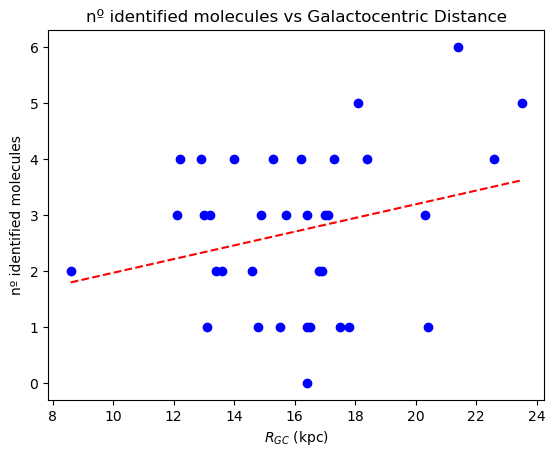

In [280]:
plt.scatter(R_GC, num_mol, color='blue')
slope, intercept, r_value, p_value, std_err = linregress(R_GC, num_mol)

x_fit = np.linspace(min(R_GC), max(R_GC), 500)
y_fit = intercept + slope * x_fit
plt.plot(x_fit, y_fit, color='red', linestyle='--')

plt.title('nº identified molecules vs Galactocentric Distance')
plt.xlabel('$R_{GC}$ (kpc)')
plt.ylabel('nº identified molecules')

plt.savefig('identified_mol.png')

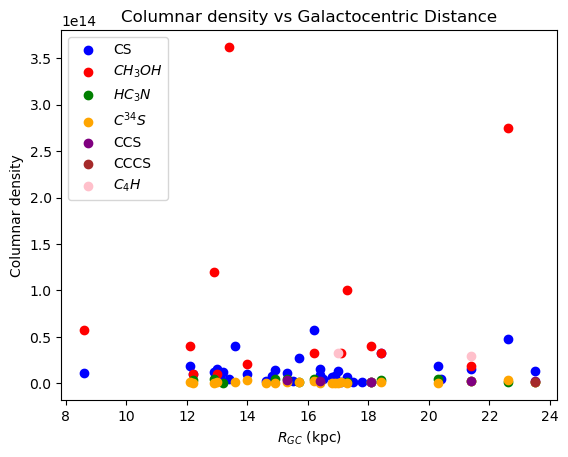

In [281]:
plt.scatter(R_GC, n_cs, color='blue', label='CS')
plt.scatter(R_GC, n_ch3oh, color='red', label=r'$CH_3OH$')
plt.scatter(R_GC, n_hc3n, color='green', label=r'$HC_3N$')
plt.scatter(R_GC, n_cs_34, color='orange', label=r'$C^{34}S$')
plt.scatter(R_GC, n_ccs, color='purple', label='CCS')
plt.scatter(R_GC, n_cccs, color='brown', label='CCCS')
plt.scatter(R_GC, n_c4h, color='pink', label=r'$C_4H$')



plt.title('Columnar density vs Galactocentric Distance')
plt.xlabel('$R_{GC}$ (kpc)')
plt.ylabel('Columnar density')
plt.legend()

plt.savefig('identified_mol_2.png')

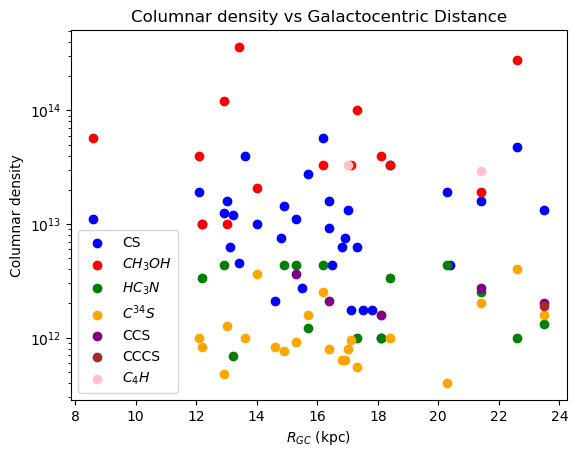

In [282]:
plt.scatter(R_GC, n_cs, color='blue', label='CS')
plt.scatter(R_GC, n_ch3oh, color='red', label=r'$CH_3OH$')
plt.scatter(R_GC, n_hc3n, color='green', label=r'$HC_3N$')
plt.scatter(R_GC, n_cs_34, color='orange', label=r'$C^{34}S$')
plt.scatter(R_GC, n_ccs, color='purple', label='CCS')
plt.scatter(R_GC, n_cccs, color='brown', label='CCCS')
plt.scatter(R_GC, n_c4h, color='pink', label=r'$C_4H$')



plt.title('Columnar density vs Galactocentric Distance')
plt.xlabel('$R_{GC}$ (kpc)')
plt.yscale('log')
plt.ylabel('Columnar density')
plt.legend()

plt.savefig('identified_mol_log.png')

### CS CS-34 Comaprision

In [283]:
comparision=X_CS/X_CS_34

In [284]:
comparision

0    1.819701e+00
1    1.148154e+01
2    1.659587e+01
3    1.202264e+01
4    1.000000e+01
5    2.290868e+01
6             NaN
7             NaN
8             NaN
9             NaN
10   1.202264e+01
11   3.311311e+01
12   8.317638e+00
13   7.943282e+00
14   4.786301e+01
15   6.309573e-01
16   1.995262e+01
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23   1.905461e+01
24            NaN
25   2.511886e+00
26            NaN
27   1.905461e+01
28   2.760578e+00
29   1.737801e+01
30            NaN
31   1.202264e+01
32            NaN
33            NaN
34            NaN
dtype: object

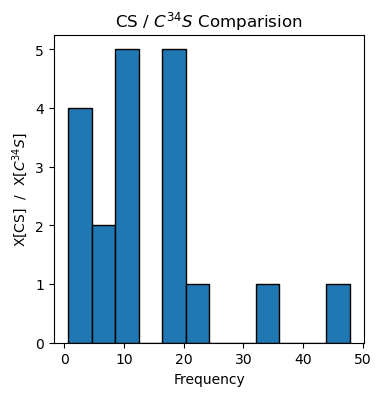

In [285]:
plt.figure(figsize=(4, 4)) 


comparision.hist(bins=12, edgecolor='black')

plt.title(r'CS / $C^{34}S$ Comparision')
plt.xlabel('Frequency')
plt.ylabel(r'X[CS]  /  X[$C^{34}S$]')
plt.grid(False)

plt.savefig('CS-CS34comparision.png')

In [286]:
valid_indices = X_CS_34.notna() & X_CS.notna()

comparision_np=pd.to_numeric(comparision[valid_indices])
error_CS_np=pd.to_numeric(error_CS[valid_indices])
error_CS_34_np=pd.to_numeric(error_CS_34[valid_indices])
X_CS_np=pd.to_numeric(X_CS[valid_indices])
X_CS_34_np=pd.to_numeric(X_CS_34[valid_indices])



In [287]:
error_prop=comparision_np*np.sqrt((error_CS_np / X_CS_np)**2+(error_CS_34_np / X_CS_34_np)**2)

In [288]:
error_prop=pd.to_numeric(error_prop)

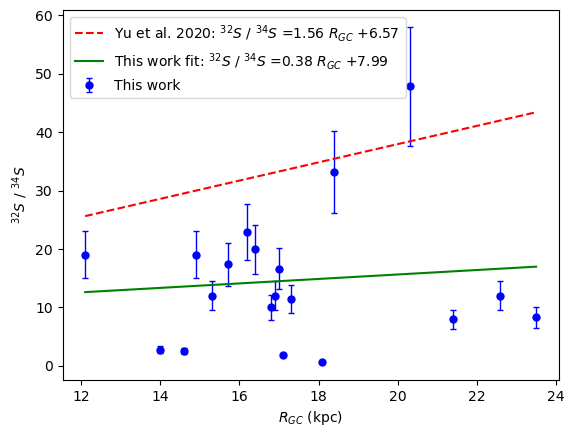

In [289]:
valid_indices = comparision.notna() & R_GC.notna()

# Plot
plt.errorbar(R_GC[valid_indices], comparision[valid_indices], yerr=error_prop[valid_indices], 
             fmt='o', color='blue', ms=5, ecolor='blue', elinewidth=1, capsize=2, label="This work")

# Yu et al. (2020)
x_fit = np.linspace(min(R_GC[valid_indices]), max(R_GC[valid_indices]), 500)
y_fit = 6.75 + 1.56 * x_fit
plt.plot(x_fit, y_fit, color='red', linestyle='--', label=fr"Yu et al. 2020: $^{{32}}S$ / $^{{34}}S$ =1.56 $R_{{GC}}$ +6.57 ")

# Linear trend
slope, intercept, r_value, p_value, std_err = linregress(R_GC[valid_indices].tolist(), comparision[valid_indices].tolist())

x_fit_2 = np.linspace(min(R_GC[valid_indices]), max(R_GC[valid_indices]), 500)
y_fit_2 = intercept + slope * x_fit
plt.plot(x_fit_2, y_fit_2, color='green', linestyle='-', label=fr"This work fit: $^{{32}}S$ / $^{{34}}S$ ={slope:.2f} $R_{{GC}}$ +{intercept:.2f} ")

# Configuration
plt.xlabel('$R_{GC}$ (kpc)')
plt.ylabel(r'$^{32}S$ / $^{34}S$')
plt.legend()
plt.savefig('CS-CS34comparision2.png')

### Abundance graphs

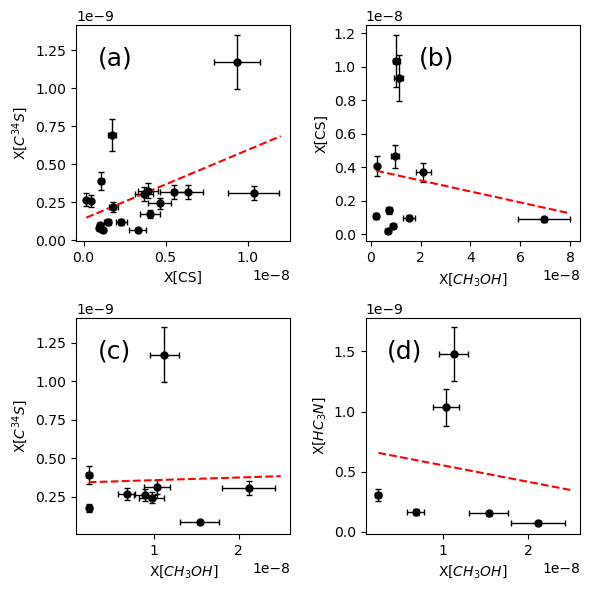

In [290]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6))  

plt.subplots_adjust(wspace=0.3, hspace=0.4)

# 1st Plot
valid_indices = X_CS.notna() & X_CS_34.notna()
x = pd.to_numeric(X_CS[valid_indices])
y = pd.to_numeric(X_CS_34[valid_indices])
x_error = error_CS[valid_indices]
y_error = error_CS_34[valid_indices]
axs[0, 0].errorbar(x, y, xerr=x_error, yerr=y_error, fmt='o', color='black', ms="5", ecolor='black', elinewidth=1, capsize=2)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
x_fit = np.linspace(min(x), 1.2e-8, 500)
y_fit = intercept + slope * x_fit
pearson_coef_a=pearsonr(x,y)
axs[0, 0].plot(x_fit, y_fit, color='red', linestyle='--', label=f'y = {slope:.2f} x')
axs[0, 0].set_xlabel(r'X[CS]')
axs[0, 0].set_ylabel(r'X[$C^{34}S$]')
#axs[0, 0].legend()
axs[0, 0].text(0.1, 0.9, '(a)', transform=axs[0, 0].transAxes, fontsize=18, verticalalignment='top')

# 2nd Plot
valid_indices = X_CS.notna() & X_CH3OH.notna()
x = pd.to_numeric(X_CH3OH[valid_indices])
y = pd.to_numeric(X_CS[valid_indices])
x_error = error_CH3OH[valid_indices]
y_error = error_CS[valid_indices]
axs[0, 1].errorbar(x, y, xerr=x_error, yerr=y_error, fmt='o', color='black', ms="5", ecolor="black", elinewidth=1, capsize=2)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
x_fit = np.linspace(min(x), 8e-8, 500)
y_fit = intercept + slope * x_fit
pearson_coef_b=pearsonr(x,y)
axs[0, 1].plot(x_fit, y_fit, color='red', linestyle='--', label=f'y = {slope:.2f} x')
axs[0, 1].set_xlabel(r'X[$CH_3OH$]')
axs[0, 1].set_ylabel(r'X[CS]')
#axs[0, 1].legend()
axs[0, 1].text(0.25, 0.9, '(b)', transform=axs[0, 1].transAxes, fontsize=18, verticalalignment='top')

# 3rd Plot
valid_indices = X_CS_34.notna() & X_CH3OH.notna()
x = pd.to_numeric(X_CH3OH[valid_indices])
y = pd.to_numeric(X_CS_34[valid_indices])
x_error = error_CH3OH[valid_indices]
y_error = error_CS_34[valid_indices]
axs[1, 0].errorbar(x, y, xerr=x_error, yerr=y_error, fmt='o', color='black', ms="5", ecolor='black', elinewidth=1, capsize=2)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
x_fit = np.linspace(min(x), 2.5e-8, 500)
y_fit = intercept + slope * x_fit
pearson_coef_c=pearsonr(x,y)
axs[1, 0].plot(x_fit, y_fit, color='red', linestyle='--', label=f'y = {slope:.2f} x')
axs[1, 0].set_xlabel(r'X[$CH_3OH$]')
axs[1, 0].set_ylabel(r'X[$C^{34}S$]')
#axs[1, 0].legend()
axs[1, 0].text(0.1, 0.9, '(c)', transform=axs[1, 0].transAxes, fontsize=18, verticalalignment='top')

# 4th Plot
valid_indices = X_CH3OH.notna() & X_HC3N.notna()
x = pd.to_numeric(X_CH3OH[valid_indices])
y = pd.to_numeric(X_HC3N[valid_indices])
x_error = error_CH3OH[valid_indices]
y_error = error_HC3N[valid_indices]
axs[1, 1].errorbar(x, y, xerr=x_error, yerr=y_error, fmt='o', color='black', ms="5", ecolor='black', elinewidth=1, capsize=2)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
x_fit = np.linspace(min(x), 2.5e-8, 500)
y_fit = intercept + slope * x_fit
pearson_coef_d=pearsonr(x,y)
axs[1, 1].plot(x_fit, y_fit, color='red', linestyle='--', label=f'y = {slope:.2f} x')
axs[1, 1].set_xlabel(r'X[$CH_3OH$]')
axs[1, 1].set_ylabel(r'X[$HC_3N$]')
#axs[1, 1].legend()
axs[1, 1].text(0.1, 0.9, '(d)', transform=axs[1, 1].transAxes, fontsize=18, verticalalignment='top')

plt.tight_layout()

plt.savefig('combined_abundance_plots_2x2.png')

In [291]:
pearson_coef_a

PearsonRResult(statistic=0.5037172158101927, pvalue=0.02789068907015338)

In [292]:
pearson_coef_b

PearsonRResult(statistic=-0.1748337949359221, pvalue=0.6071370822924603)

In [293]:
pearson_coef_c

PearsonRResult(statistic=0.032200061328871585, pvalue=0.9344592258540706)

In [294]:
pearson_coef_d

PearsonRResult(statistic=-0.1543228914188559, pvalue=0.7703533055116814)

In [295]:
R_GC

0    1.710000e+01
1    1.730000e+01
2    1.700000e+01
3    1.690000e+01
4    1.680000e+01
5    1.620000e+01
6    1.640000e+01
7    1.640000e+01
8    1.780000e+01
9    2.040000e+01
10   2.260000e+01
11   1.840000e+01
12   2.350000e+01
13   2.140000e+01
14   2.030000e+01
15   1.810000e+01
16   1.640000e+01
17   1.320000e+01
18   1.360000e+01
19   1.300000e+01
20   1.220000e+01
21   1.290000e+01
22   8.600000e+00
23   1.490000e+01
24   1.550000e+01
25   1.460000e+01
26   1.340000e+01
27   1.210000e+01
28   1.400000e+01
29   1.570000e+01
30   1.310000e+01
31   1.530000e+01
32   1.480000e+01
33   1.650000e+01
34   1.750000e+01
Name: R_GC, dtype: float64

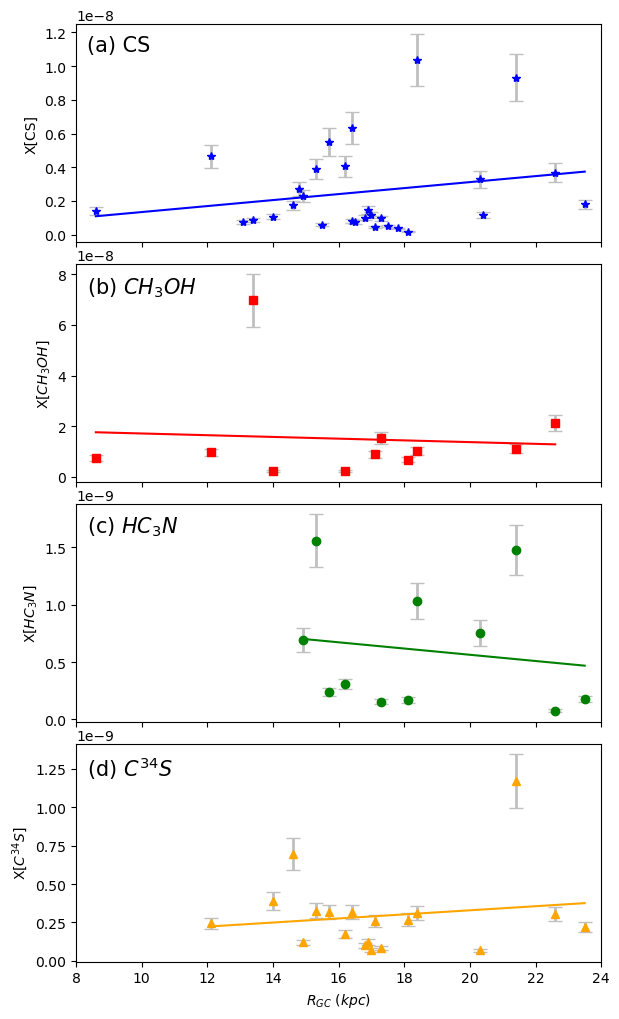

In [296]:
fig, axs = plt.subplots(4, 1, figsize=(6, 10), sharex=True)  

# X_CS vs R_GC
valid_indices_CS = X_CS.notna() & R_GC.notna()
x_CS = R_GC[valid_indices_CS]
y_CS = X_CS[valid_indices_CS]
y_error=error_CS[valid_indices_CS]

axs[0].errorbar(x_CS, y_CS, yerr=y_error, fmt='*', color='blue', ecolor='#C0C0C0', elinewidth=2, capsize=5)

x_CS = pd.to_numeric(x_CS)
y_CS = pd.to_numeric(y_CS)

slope, intercept, r_value, p_value, std_err = linregress(x_CS, y_CS)
r_squared = r_value**2  # R^2

x_CS_fit = np.linspace(min(x_CS), max(x_CS), 500)
y_CS_fit = intercept + slope * x_CS_fit

axs[0].plot(x_CS_fit, y_CS_fit, color='blue')

axs[0].set_ylabel(r'X[CS]')
axs[0].set_xlim(8, 24)
axs[0].text(0.02, 0.95, '(a) CS', transform=axs[0].transAxes, fontsize=15, verticalalignment='top')
label_0=f'Fit: y = {slope} x + {intercept} \n$R^2$ = {r_squared}'

# X_CH3OH vs R_GC
valid_indices_CH3OH = X_CH3OH.notna() & R_GC.notna()
x_CH3OH = R_GC[valid_indices_CH3OH]
y_CH3OH = X_CH3OH[valid_indices_CH3OH]
y_error=error_CH3OH[valid_indices_CH3OH]

x_CH3OH = pd.to_numeric(x_CH3OH)
y_CH3OH = pd.to_numeric(y_CH3OH)

slope, intercept, r_value, p_value, std_err = linregress(x_CH3OH, y_CH3OH)
r_squared = r_value**2

x_CH3OH_fit = np.linspace(min(x_CH3OH), max(x_CH3OH), 500)
y_CH3OH_fit = intercept + slope * x_CH3OH_fit

axs[1].errorbar(x_CH3OH, y_CH3OH, yerr=y_error, fmt='s', color='red', ecolor='#C0C0C0', elinewidth=2, capsize=5)


axs[1].plot(x_CH3OH_fit, y_CH3OH_fit, color='red')
axs[1].set_ylabel(r'X[$CH_3OH$]')
axs[1].set_xlim(8, 24)
axs[1].text(0.02, 0.95, r'(b) $CH_3OH$', transform=axs[1].transAxes, fontsize=15, verticalalignment='top')
label_1=f'Fit: y = {slope}x + {intercept}\n$R^2$ = {r_squared}'

# X_HC3N vs R_GC
valid_indices_HC3N = X_HC3N.notna() & R_GC.notna()
x_HC3N = R_GC[valid_indices_HC3N]
y_HC3N = X_HC3N[valid_indices_HC3N]
y_error=error_HC3N[valid_indices_HC3N]

x_HC3N = pd.to_numeric(x_HC3N)
y_HC3N = pd.to_numeric(y_HC3N)

slope, intercept, r_value, p_value, std_err = linregress(x_HC3N, y_HC3N)
r_squared = r_value**2

x_HC3N_fit = np.linspace(min(x_HC3N), max(x_HC3N), 500)
y_HC3N_fit = intercept + slope * x_HC3N_fit

axs[2].errorbar(x_HC3N, y_HC3N, yerr=y_error, fmt='o', color='green', ecolor='#C0C0C0', elinewidth=2, capsize=5)

axs[2].plot(x_HC3N_fit, y_HC3N_fit, color='green')
axs[2].set_ylabel(r'X[$HC_3N$]')
axs[2].set_xlim(8, 24)
axs[2].text(0.02, 0.95, r'(c) $HC_3N$', transform=axs[2].transAxes, fontsize=15, verticalalignment='top')
label_2=f'Fit: y = {slope}x + {intercept}\n$R^2$ = {r_squared}'

# X_CS_34 vs R_GC
valid_indices_CS_34 = X_CS_34.notna() & R_GC.notna()
x_CS_34 = R_GC[valid_indices_CS_34]
y_CS_34 = X_CS_34[valid_indices_CS_34]
y_error=error_CS_34[valid_indices_CS_34]

x_CS_34 = pd.to_numeric(x_CS_34)
y_CS_34 = pd.to_numeric(y_CS_34)

slope, intercept, r_value, p_value, std_err = linregress(x_CS_34, y_CS_34)
r_squared = r_value**2

x_CS_34_fit = np.linspace(min(x_CS_34), max(x_CS_34), 500)
y_CS_34_fit = intercept + slope * x_CS_34_fit

axs[3].errorbar(x_CS_34, y_CS_34, yerr=y_error, fmt='^', color='orange', ecolor='#C0C0C0', elinewidth=2, capsize=5)

axs[3].plot(x_CS_34_fit, y_CS_34_fit, color='orange')
axs[3].set_xlabel(r'$R_{GC} \ (kpc)$') 
axs[3].set_ylabel(r'X[$C^{34}S$]')
axs[3].set_xlim(8, 24)
axs[3].text(0.02, 0.95, r'(d) $C^{34}S$', transform=axs[3].transAxes, fontsize=15, verticalalignment='top')
label_3=f'Fit: y = {slope}x + {intercept}\n$R^2$ = {r_squared}'

plt.tight_layout(pad=0.0, h_pad=0.0, w_pad=0.0, rect=[0, 0, 1, 1])
plt.savefig("rc.png", dpi=300)

In [297]:
label_0, label_1, label_2, label_3

('Fit: y = 1.7755369561159218e-10 x + -4.314185698864192e-10 \n$R^2$ = 0.045003129350967515',
 'Fit: y = -3.4081370615095146e-10x + 2.0566023686684433e-08\n$R^2$ = 0.00537941913262494',
 'Fit: y = -2.7158199838818734e-11x + 1.107061225607437e-09\n$R^2$ = 0.022778892756822638',
 'Fit: y = 1.3291160078848437e-11x + 6.302186423761228e-11\n$R^2$ = 0.022499368275290345')

### Detection Rates

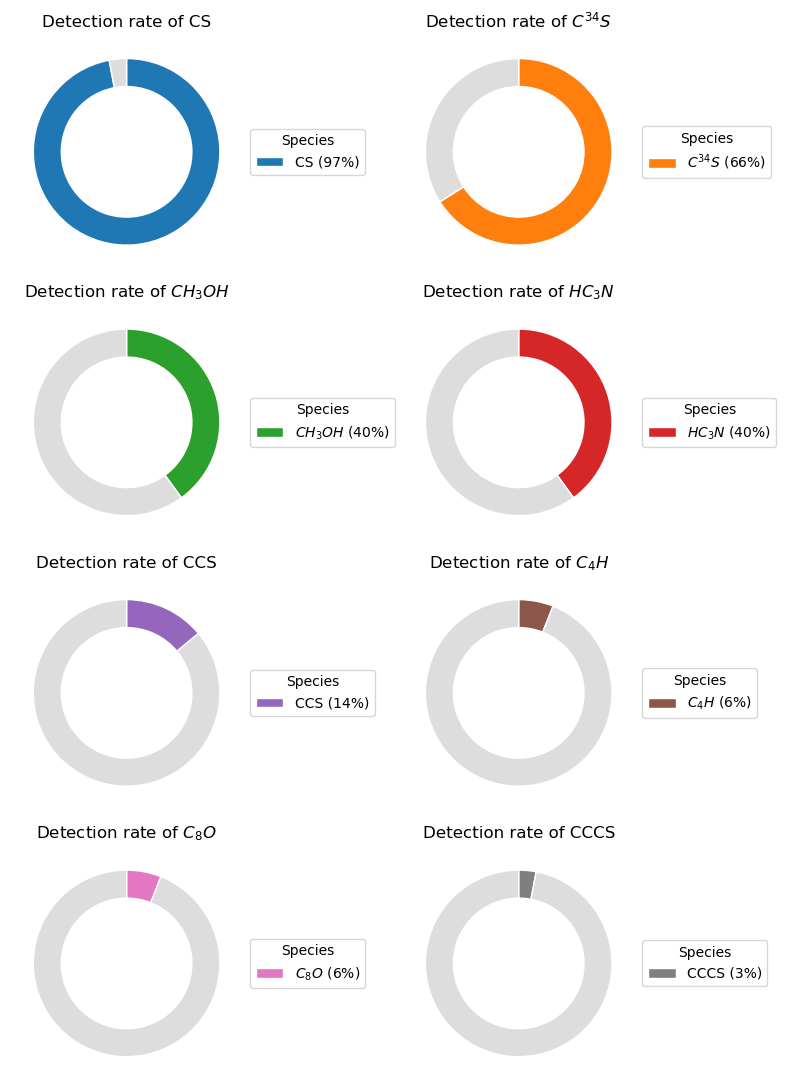

In [298]:
import matplotlib.pyplot as plt

species = [r'CS', r'$C^{34}S$', r'$CH_3OH$', r'$HC_3N$', r'CCS', r'$C_4H$', r'$C_8O$', r'CCCS']
percentages = [97, 66, 40, 40, 14, 6, 6, 3]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

order = [0, 2, 4, 6, 1, 3, 5, 7]

fig, axs = plt.subplots(4, 2, figsize=(8.5, 11))  

plt.subplots_adjust(wspace=0.3, hspace=0.4)

for i, index in enumerate(order):
    species_name = species[index]
    percentage = percentages[index]
    
    row = i % 4  
    col = i // 4  
    
    ax = axs[row, col]
    
    wedges, _ = ax.pie([percentage, 100 - percentage], 
                       colors=[colors[index], '#dddddd'], 
                       startangle=90, 
                       counterclock=False, 
                       wedgeprops=dict(width=0.3, edgecolor='white'))
    
    percentage_label = f'{species_name} ({percentage}%)'
    ax.legend([wedges[0]], [percentage_label], title="Species", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    ax.set_title(f'Detection rate of {species_name}', fontsize=12)
    
plt.tight_layout()

plt.savefig('doughnut_plots_with_percentages_in_legend_A4.png')

### Histograms

* Abundance histograms:

/home/propietario/anaconda3/lib/python3.10/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/propietario/anaconda3/lib/python3.10/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


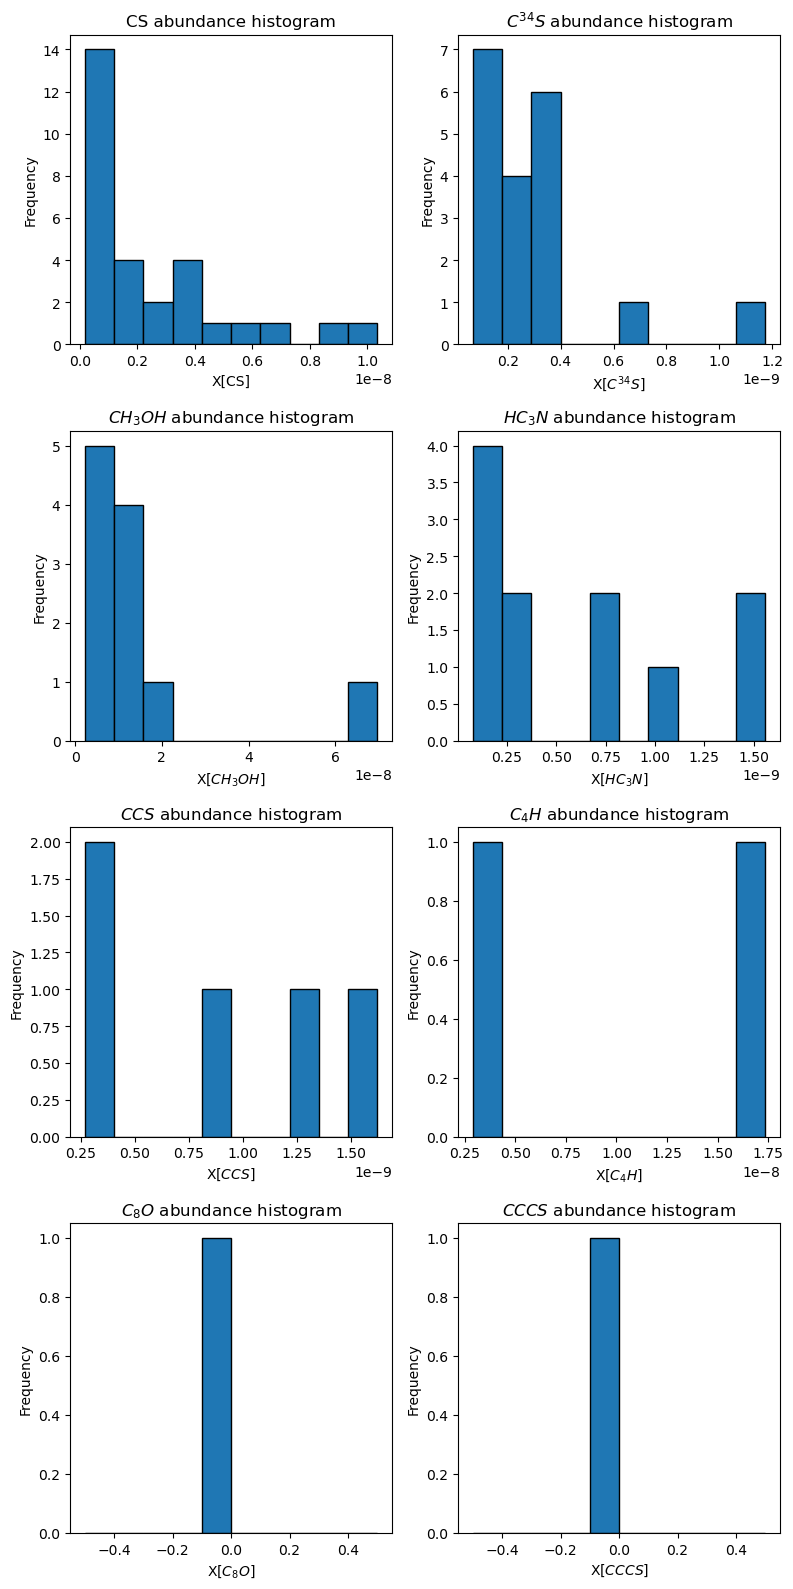

In [299]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 2, figsize=(8, 16))  

axs[0, 0].hist(X_CS, bins=10, edgecolor='black')
axs[0, 0].set_title('CS abundance histogram')
axs[0, 0].set_xlabel(r'X[CS]')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].grid(False)

axs[0, 1].hist(X_CS_34, bins=10, edgecolor='black')
axs[0, 1].set_title(r'$C^{34}S$ abundance histogram')
axs[0, 1].set_xlabel(r'X[$C^{34}S$]')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(False)

axs[1, 0].hist(X_CH3OH, bins=10, edgecolor='black')
axs[1, 0].set_title(r'$CH_3OH$ abundance histogram')
axs[1, 0].set_xlabel(r'X[$CH_3OH$]')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(False)

axs[1, 1].hist(X_HC3N, bins=10, edgecolor='black')
axs[1, 1].set_title(r'$HC_3N$ abundance histogram')
axs[1, 1].set_xlabel(r'X[$HC_3N$]')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(False)

axs[2, 0].hist(X_CCS, bins=10, edgecolor='black')
axs[2, 0].set_title(r'$CCS$ abundance histogram')
axs[2, 0].set_xlabel(r'X[$CCS$]')
axs[2, 0].set_ylabel('Frequency')
axs[2, 0].grid(False)

axs[2, 1].hist(X_C4H, bins=10, edgecolor='black')
axs[2, 1].set_title(r'$C_4H$ abundance histogram')
axs[2, 1].set_xlabel(r'X[$C_4H$]')
axs[2, 1].set_ylabel('Frequency')
axs[2, 1].grid(False)

axs[3, 0].hist(X_C8O, bins=10, edgecolor='black')
axs[3, 0].set_title(r'$C_8O$ abundance histogram')
axs[3, 0].set_xlabel(r'X[$C_8O$]')
axs[3, 0].set_ylabel('Frequency')
axs[3, 0].grid(False)

axs[3, 1].hist(X_CCCS, bins=10, edgecolor='black')
axs[3, 1].set_title(r'$CCCS$ abundance histogram')
axs[3, 1].set_xlabel(r'X[$CCCS$]')
axs[3, 1].set_ylabel('Frequency')
axs[3, 1].grid(False)

plt.tight_layout()

plt.savefig('all_histograms_individual.png')
plt.show()

* n(H2) histogram:

In [300]:
n_h2=n_h2/10**21

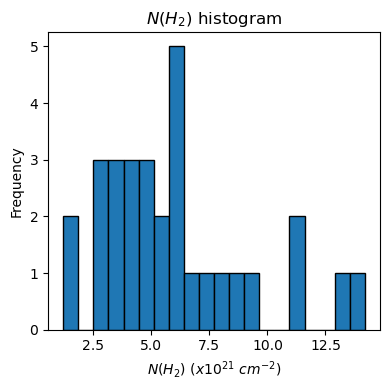

In [301]:
plt.figure(figsize=(4, 4)) 

plt.hist(n_h2, bins=20, edgecolor='black')

plt.title(r'$N(H_2)$ histogram')
plt.xlabel(r'$N(H_2) \ (x10^{21} \ cm^{-2})$')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('NH2_histogram.png')

* Temperature histograms:

In [302]:
CS = [["WB89-315",4.78 ],
    ["WB89-379", 6],
    ["WB89-380", 4.78],
    ["WB89-391", 4.78],
    ["WB89-399", 5],
    ["WB89-437", 4.6],
    ["WB89-440", None],
    ["WB89-501", 4.42],
    ["WB89-529", 4.78],
    ["WB89-572", 4.78],
    ["WB89-621", 4.78],
    ["WB89-640", 4.6],
    ["WB89-670", 3.7],
    ["WB89-705", 4.78],
    ["WB89-789", 4.2],
    ["WB89-793", 4.78],
    ["WB89-898", 4.78],
    ["19383+2711",10],
    ["19423+2541",4.74],
    ["19489+3030",4.78],
    ["19571+3113",4.52],
    ["20243+3853",6.06],
    ["WB89-002", 3.6399],
    ["WB89-006", 4.78],
    ["WB89-014", 4.78],
    ["WB89-031", 4.78],
    ["WB89-035", 4.78],
    ["WB89-040", 6.06],
    ["WB89-060", 7.16],
    ["WB89-076", 5],
    ["WB89-080", 5],
    ["WB89-083", 4.52],
    ["WB89-152", 4.78],
    ["WB89-283", 4.52],
    ["WB89-288", 4.78]
]

In [303]:
df = pd.DataFrame(CS, columns=["source", "T(CS)"])
T_cs = df["T(CS)"]

In [304]:
C8O = [["WB89-315",None ],
    ["WB89-379", None],
    ["WB89-380", None],
    ["WB89-391", None],
    ["WB89-399", None],
    ["WB89-437", None],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None], 
    ["WB89-621", None],
    ["WB89-640", None],
    ["WB89-670", None],
    ["WB89-705", None],
    ["WB89-789", None],
    ["WB89-793", None],
    ["WB89-898", None],
    ["19383+2711",4.78],
    ["19423+2541",None],
    ["19489+3030",None],
    ["19571+3113",None],
    ["20243+3853",None],
    ["WB89-002", None],
    ["WB89-006", None],
    ["WB89-014", None],
    ["WB89-031", None],
    ["WB89-035", None],
    ["WB89-040", None],
    ["WB89-060", 4.78],
    ["WB89-076", None],
    ["WB89-080", None],
    ["WB89-083", None],
    ["WB89-152",None ],
    ["WB89-283", None],
    ["WB89-288",None ]
]

In [305]:
df = pd.DataFrame(C8O, columns=["source", "T(C8O)"])
T_c8o = df["T(C8O)"]

In [306]:
CS_34 = [["WB89-315", 6.4], 
    ["WB89-379", 6.58],
    ["WB89-380", 5.32],
    ["WB89-391", 5.32],
    ["WB89-399", 4.6],
    ["WB89-437", 5.32],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None],
    ["WB89-621", 4.96],
    ["WB89-640", 6.22],
    ["WB89-670", 3.52],
    ["WB89-705", 5.5],
    ["WB89-789", 5.32],
    ["WB89-793", 5.32],
    ["WB89-898", 4.24],
    ["19383+2711",None],
    ["19423+2541",4.78],
    ["19489+3030",5.14],
    ["19571+3113",6.04],
    ["20243+3853",4.42],
    ["WB89-002",None ],
    ["WB89-006", 3.7],
    ["WB89-014", None],
    ["WB89-031",4.78],
    ["WB89-035",None ],
    ["WB89-040", 5.32],
    ["WB89-060", 5.32],
    ["WB89-076", 4.6],
    ["WB89-080", None],
    ["WB89-083", 4.78],
    ["WB89-152",None],
    ["WB89-283", None],
    ["WB89-288", None]
]

In [307]:
df = pd.DataFrame(CS_34, columns=["source", "T(CS-34)"])
T_cs_34 = df["T(CS-34)"]

In [308]:
CH3OH = [["WB89-315", 3.2],
    ["WB89-379", 4.0],
    ["WB89-380", None],
    ["WB89-391", None],
    ["WB89-399", None],
    ["WB89-437", 3.1],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None],
    ["WB89-621",  4.78],
    ["WB89-640", 3.2],
    ["WB89-670", None],
    ["WB89-705", 4.78],
    ["WB89-789",None ],
    ["WB89-793",3.1],
    ["WB89-898", None],
    ["19383+2711",None],
    ["19423+2541",None],
    ["19489+3030",3.4],
    ["19571+3113",3.0],
    ["20243+3853",9.0],
    ["WB89-002", 5.0],
    ["WB89-006", None],
    ["WB89-014", None],
    ["WB89-031", None],
    ["WB89-035", 3.34],
    ["WB89-040", 2.98],
    ["WB89-060", 4.78],
    ["WB89-076", None],
    ["WB89-080", None],
    ["WB89-083", None],
    ["WB89-152", None],
    ["WB89-283", None],
    ["WB89-288", None]
]

In [309]:
df = pd.DataFrame(CH3OH, columns=["source", "T(CH3OH)"])
T_ch3oh = df["T(CH3OH)"]

In [310]:
HC3N = [["WB89-315", None],
    ["WB89-379",4.78 ],
    ["WB89-380", None],
    ["WB89-391", None],
    ["WB89-399", None],
    ["WB89-437", 3.2],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None],
    ["WB89-621", 3.0],
    ["WB89-640", 3.5],
    ["WB89-670", 4.78],
    ["WB89-705", 4.78],
    ["WB89-789", 3.2],
    ["WB89-793", 4.78],
    ["WB89-898", None],
    ["19383+2711",4.0],
    ["19423+2541",None],
    ["19489+3030",None],
    ["19571+3113",3.0],
    ["20243+3853",3.2],
    ["WB89-002", None],
    ["WB89-006", 3.2],
    ["WB89-014", None],
    ["WB89-031", None],
    ["WB89-035", None],
    ["WB89-040", None],
    ["WB89-060", None],
    ["WB89-076", 4.78],
    ["WB89-080", None],
    ["WB89-083", 3.2],
    ["WB89-152", None],
    ["WB89-283", None],
    ["WB89-288", None]
]

In [311]:
df = pd.DataFrame(HC3N, columns=["source", "T(HC3N)"])
T_hc3n = df["T(HC3N)"]

In [312]:
CCS = [["WB89-315", None],
    ["WB89-379", None],
    ["WB89-380", None],
    ["WB89-391", None],
    ["WB89-399", None],
    ["WB89-437", None],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None],
    ["WB89-621", None],
    ["WB89-640", None],
    ["WB89-670", 4.78],
    ["WB89-705", 4.78],
    ["WB89-789", None],
    ["WB89-793", 4.78],
    ["WB89-898", 6.0],
    ["19383+2711",None],
    ["19423+2541",None],
    ["19489+3030",None],
    ["19571+3113",None],
    ["20243+3853",None],
    ["WB89-002", None],
    ["WB89-006", None],
    ["WB89-014", None],
    ["WB89-031", None],
    ["WB89-035", None],
    ["WB89-040", None],
    ["WB89-060", None],
    ["WB89-076", None],
    ["WB89-080", None],
    ["WB89-083", 3.2],
    ["WB89-152", None],
    ["WB89-283", None],
    ["WB89-288", None]
]

In [313]:
df = pd.DataFrame(CCS, columns=["source", "T(CCS)"])
T_ccs = df["T(CCS)"]

In [314]:
CCCS = [["WB89-315", None],
    ["WB89-379", None],
    ["WB89-380", None],
    ["WB89-391", None],
    ["WB89-399", None],
    ["WB89-437", None],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None],
    ["WB89-621", None],
    ["WB89-640", None],
    ["WB89-670", 4.78],
    ["WB89-705", None],
    ["WB89-789", None],
    ["WB89-793", None],
    ["WB89-898", None],
    ["19383+2711",None],
    ["19423+2541",None],
    ["19489+3030",None],
    ["19571+3113",None],
    ["20243+3853",None],
    ["WB89-002", None],
    ["WB89-006", None],
    ["WB89-014", None],
    ["WB89-031", None],
    ["WB89-035", None],
    ["WB89-040", None],
    ["WB89-060", None],
    ["WB89-076", None],
    ["WB89-080", None],
    ["WB89-083", None],
    ["WB89-152", None],
    ["WB89-283", None],
    ["WB89-288", None]
]

In [315]:
df = pd.DataFrame(CCCS, columns=["source", "T(CCCS)"])
T_cccs = df["T(CCCS)"]

In [316]:
C4H = [["WB89-315", None],
    ["WB89-379", None],
    ["WB89-380", 3.2],
    ["WB89-391", None],
    ["WB89-399", None],
    ["WB89-437", None],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None],
    ["WB89-621", None],
    ["WB89-640", None],
    ["WB89-670", None],
    ["WB89-705", 4.78],
    ["WB89-789", None],
    ["WB89-793", None],
    ["WB89-898", None],
    ["19383+2711",None],
    ["19423+2541",None],
    ["19489+3030",None],
    ["19571+3113",None],
    ["20243+3853",None],
    ["WB89-002", None],
    ["WB89-006", None],
    ["WB89-014", None],
    ["WB89-031", None],
    ["WB89-035", None],
    ["WB89-040", None],
    ["WB89-060", None],
    ["WB89-076", None],
    ["WB89-080", None],
    ["WB89-083", None],
    ["WB89-152", None],
    ["WB89-283", None],
    ["WB89-288", None]
]

In [317]:
df = pd.DataFrame(C4H, columns=["source", "T(C4H)"])
T_c4h = df["T(C4H)"]

In [318]:
data = [T_cs , T_c8o, T_cs_34, T_ch3oh, T_hc3n, T_ccs, T_cccs, T_c4h]
labels = ['CS', r'$C_8O$', r'$C^{34}S$', r'$CH_3OH$', r'$HC_3N$', r'CCS', r'CCCS', r'$C_4H$']

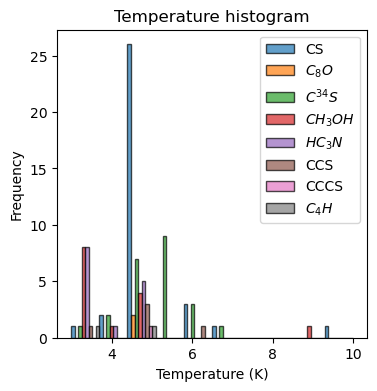

In [319]:
plt.figure(figsize=(4, 4)) 


plt.hist(data, bins=10, edgecolor='black', label=labels, histtype='bar', alpha=0.7, rwidth=1)

plt.title(r'Temperature histogram')
plt.xlabel(r'Temperature (K)')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('temp_histo.png')

* FHWM histograms:

In [320]:
CS = [["WB89-315",1 ],
    ["WB89-379", 1.4],
    ["WB89-380", 1.8],
    ["WB89-391", 1.4],
    ["WB89-399", 1.2],
    ["WB89-437", 2.2],
    ["WB89-440", None],
    ["WB89-501", 1.6],
    ["WB89-529", 1.2],
    ["WB89-572", 1.6],
    ["WB89-621", 1.9],
    ["WB89-640", 1.6],
    ["WB89-670", 0.6],
    ["WB89-705", 1],
    ["WB89-789", 1.8],
    ["WB89-793", 1.6],
    ["WB89-898", 2.2],
    ["19383+2711", 3],
    ["19423+2541", 5.18],
    ["19489+3030",2.1],
    ["19571+3113",1.88],
    ["20243+3853",2.54],
    ["WB89-002", 1],
    ["WB89-006", 2.98],
    ["WB89-014", 2.1],
    ["WB89-031", 1],
    ["WB89-035", 1.88],
    ["WB89-040", 2.54],
    ["WB89-060", 2.76],
    ["WB89-076", 2.26],
    ["WB89-080", 2.8],
    ["WB89-083", 1.36],
    ["WB89-152", 3.16],
    ["WB89-283", 1.9],
    ["WB89-288", 1]
]

In [321]:
df = pd.DataFrame(CS, columns=["source", "FWHM(CS)"])
fwmh_cs = df["FWHM(CS)"]

In [322]:
C8O = [["WB89-315",None ],
    ["WB89-379", None],
    ["WB89-380", None],
    ["WB89-391", None],
    ["WB89-399", None],
    ["WB89-437", None],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None], 
    ["WB89-621", None],
    ["WB89-640", None],
    ["WB89-670", None],
    ["WB89-705", None],
    ["WB89-789", None],
    ["WB89-793", None],
    ["WB89-898", None],
    ["19383+2711", 2],
    ["19423+2541",None],
    ["19489+3030",None],
    ["19571+3113",None],
    ["20243+3853",None],
    ["WB89-002", None],
    ["WB89-006", None],
    ["WB89-014", None],
    ["WB89-031", None],
    ["WB89-035", None],
    ["WB89-040", None],
    ["WB89-060", 1.00],
    ["WB89-076", None],
    ["WB89-080", None],
    ["WB89-083", None],
    ["WB89-152",None ],
    ["WB89-283", None],
    ["WB89-288",None ]
]

In [323]:
df = pd.DataFrame(C8O, columns=["source", "FWHM(C8O)"])
fwmh_c8o = df["FWHM(C8O)"]

In [324]:
CS_34 = [["WB89-315", 0.76], #FWHM
    ["WB89-379", 0.64],
    ["WB89-380", 0.79],
    ["WB89-391", 0.88],
    ["WB89-399", 0.91],
    ["WB89-437",1.31],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None],
    ["WB89-621", 1.28],
    ["WB89-640", 0.91],
    ["WB89-670", 0.64],
    ["WB89-705", 0.91],
    ["WB89-789", 0.52],
    ["WB89-793", 1.07],
    ["WB89-898", 0.71],
    ["19383+2711",None],
    ["19423+2541",1.07],
    ["19489+3030",0.96],
    ["19571+3113",0.76],
    ["20243+3853", 0.64],
    ["WB89-002",None ],
    ["WB89-006", 0.68],
    ["WB89-014", None],
    ["WB89-031",0.88],
    ["WB89-035",None],
    ["WB89-040",1.19],
    ["WB89-060", 1.92],
    ["WB89-076", 1.28],
    ["WB89-080", None],
    ["WB89-083", 1.12],
    ["WB89-152",None],
    ["WB89-283", None],
    ["WB89-288", None]
]

In [325]:
df = pd.DataFrame(CS_34, columns=["source", "FWHM(CS_34)"])
fwmh_cs_34 = df["FWHM(CS_34)"]

In [326]:
CH3OH = [["WB89-315", 2.08],
    ["WB89-379", 1.2],
    ["WB89-380", None],
    ["WB89-391", None],
    ["WB89-399", None],
    ["WB89-437", 1.80],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None],
    ["WB89-621",  2.0],
    ["WB89-640", 2.4],
    ["WB89-670", None],
    ["WB89-705", 0.8],
    ["WB89-789", 1.8],
    ["WB89-793",2.4],
    ["WB89-898", None],
    ["19383+2711",None],
    ["19423+2541",None],
    ["19489+3030",1.0],
    ["19571+3113",1.0],
    ["20243+3853",2.4],
    ["WB89-002", 1.0],
    ["WB89-006", None],
    ["WB89-014", None],
    ["WB89-031", None],
    ["WB89-035", 1.0],
    ["WB89-040", 1.72],
    ["WB89-060", 1.6],
    ["WB89-076", None],
    ["WB89-080", None],
    ["WB89-083", None],
    ["WB89-152", None],
    ["WB89-283", None],
    ["WB89-288", None]
]

In [327]:
df = pd.DataFrame(CH3OH, columns=["source", "FWHM(CH3OH)"])
fwmh_ch3oh = df["FWHM(CH3OH)"]

In [328]:
HC3N = [["WB89-315", None],
    ["WB89-379",1.0 ],
    ["WB89-380", None],
    ["WB89-391", None],
    ["WB89-399", None],
    ["WB89-437", 1.8],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None],
    ["WB89-621", 1.5],
    ["WB89-640", 2.4],
    ["WB89-670", 1.5],
    ["WB89-705", 1.6],
    ["WB89-789", 2.4],
    ["WB89-793", 1.0],
    ["WB89-898", None],
    ["19383+2711",0.8],
    ["19423+2541",None],
    ["19489+3030",None],
    ["19571+3113",1.0],
    ["20243+3853",2.4],
    ["WB89-002", None],
    ["WB89-006", 1.54],
    ["WB89-014", None],
    ["WB89-031", None],
    ["WB89-035", None],
    ["WB89-040", None],
    ["WB89-060", None],
    ["WB89-076", 1.6],
    ["WB89-080", None],
    ["WB89-083", 1.72],
    ["WB89-152", None],
    ["WB89-283", None],
    ["WB89-288", None]
]

In [329]:
df = pd.DataFrame(HC3N, columns=["source", "FWHM(HC3N)"])
fwmh_hc3n = df["FWHM(HC3N)"]

In [330]:
CCS = [["WB89-315", None],
    ["WB89-379", None],
    ["WB89-380", None],
    ["WB89-391", None],
    ["WB89-399", None],
    ["WB89-437", None],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None],
    ["WB89-621", None],
    ["WB89-640", None],
    ["WB89-670", 1.45],
    ["WB89-705", 1.0],
    ["WB89-789", None],
    ["WB89-793", 1.0],
    ["WB89-898", 2.4],
    ["19383+2711",None],
    ["19423+2541",None],
    ["19489+3030",None],
    ["19571+3113",None],
    ["20243+3853",None],
    ["WB89-002", None],
    ["WB89-006", None],
    ["WB89-014", None],
    ["WB89-031", None],
    ["WB89-035", None],
    ["WB89-040", None],
    ["WB89-060", None],
    ["WB89-076", None],
    ["WB89-080", None],
    ["WB89-083", 1.36],
    ["WB89-152", None],
    ["WB89-283", None],
    ["WB89-288", None]
]

In [331]:
df = pd.DataFrame(CCS, columns=["source", "FWHM(CCS)"])
fwmh_ccs = df["FWHM(CCS)"]

In [332]:
CCCS = [["WB89-315", None],
    ["WB89-379", None],
    ["WB89-380", None],
    ["WB89-391", None],
    ["WB89-399", None],
    ["WB89-437", None],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None],
    ["WB89-621", None],
    ["WB89-640", None],
    ["WB89-670", 1.90],
    ["WB89-705", None],
    ["WB89-789", None],
    ["WB89-793", None],
    ["WB89-898", None],
    ["19383+2711",None],
    ["19423+2541",None],
    ["19489+3030",None],
    ["19571+3113",None],
    ["20243+3853",None],
    ["WB89-002", None],
    ["WB89-006", None],
    ["WB89-014", None],
    ["WB89-031", None],
    ["WB89-035", None],
    ["WB89-040", None],
    ["WB89-060", None],
    ["WB89-076", None],
    ["WB89-080", None],
    ["WB89-083", None],
    ["WB89-152", None],
    ["WB89-283", None],
    ["WB89-288", None]
]

In [333]:
df = pd.DataFrame(CCCS, columns=["source", "FWHM(CCCS)"])
fwmh_cccs = df["FWHM(CCCS)"]

In [334]:
C4H = [["WB89-315", None],
    ["WB89-379", None],
    ["WB89-380", 1.1],
    ["WB89-391", None],
    ["WB89-399", None],
    ["WB89-437", None],
    ["WB89-440", None],
    ["WB89-501", None],
    ["WB89-529", None],
    ["WB89-572", None],
    ["WB89-621", None],
    ["WB89-640", None],
    ["WB89-670", None],
    ["WB89-705", 1.05],
    ["WB89-789", None],
    ["WB89-793", None],
    ["WB89-898", None],
    ["19383+2711",None],
    ["19423+2541",None],
    ["19489+3030",None],
    ["19571+3113",None],
    ["20243+3853",None],
    ["WB89-002", None],
    ["WB89-006", None],
    ["WB89-014", None],
    ["WB89-031", None],
    ["WB89-035", None],
    ["WB89-040", None],
    ["WB89-060", None],
    ["WB89-076", None],
    ["WB89-080", None],
    ["WB89-083", None],
    ["WB89-152", None],
    ["WB89-283", None],
    ["WB89-288", None]
]

In [335]:
df = pd.DataFrame(C4H, columns=["source", "FWHM(C4H)"])
fwmh_c4h = df["FWHM(C4H)"]

In [336]:
data = [fwmh_cs , fwmh_c8o, fwmh_cs_34, fwmh_ch3oh, fwmh_hc3n, fwmh_ccs, fwmh_cccs, fwmh_c4h]
labels = ['CS', r'$C_8O$', r'$C^{34}S$', r'$CH_3OH$', r'$HC_3N$', r'CCS', r'CCCS', r'$C_4H$']

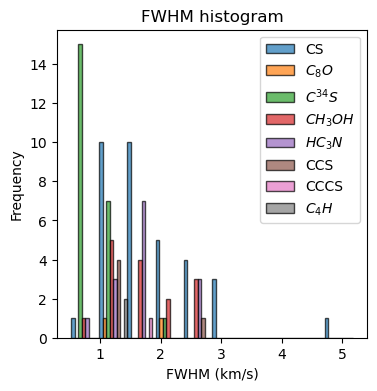

In [337]:
plt.figure(figsize=(4, 4)) 

plt.hist(data, bins=10, edgecolor='black', label=labels, histtype='bar', alpha=0.7, rwidth=1)

plt.title(r'FWHM histogram')
plt.xlabel(r'FWHM (km/s)')
plt.ylabel('Frequency')
plt.legend()

plt.savefig('fwhm_histo.png')